In [128]:
import os
import numpy as np
import pandas as pd

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [94]:
DATASET_PATH = 'data'

# train.csv

In [95]:
origin_df = pd.read_csv(os.path.join(DATASET_PATH, 'train.csv'))  # 비식별화된 도로 35개 컬럼

#### 시계열 데이터는 head, tail 참고해야 한대

In [96]:
origin_df.head()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
0,20200101,0,83247,19128,2611,5161,1588,892,32263,1636,...,1311,3482,11299,7072,1176,3810,748,3920,2133,3799
1,20200101,1,89309,19027,3337,5502,1650,1043,35609,1644,...,1162,3849,13180,8771,1283,3763,782,3483,2057,4010
2,20200101,2,66611,14710,2970,4631,1044,921,26821,1104,...,768,2299,7986,5426,1536,3229,491,2634,1526,3388
3,20200101,3,53290,13753,2270,4242,1021,790,21322,909,...,632,1716,5703,3156,1104,2882,431,2488,1268,3686
4,20200101,4,52095,17615,2406,3689,1840,922,22711,1354,...,875,2421,5816,2933,1206,2433,499,2952,1927,5608


In [97]:
origin_df.tail()

,날짜,시간,10,100,101,120,121,140,150,160,...,1020,1040,1100,1200,1510,2510,3000,4510,5510,6000
3274,20200517,19,311727,101285,10085,30637,10060,8749,148935,6801,...,6726,15431,25597,14292,9300,22238,3786,16936,10729,20194
3275,20200517,20,305354,91426,8607,26021,8095,7198,136503,6147,...,5501,15378,24661,14747,8239,20604,3203,15018,9767,17962
3276,20200517,21,306008,75113,6325,19933,5711,4494,129412,5134,...,4216,12558,22781,14081,6392,17937,2447,12403,7825,14031
3277,20200517,22,237447,49498,4209,12145,3891,2718,96698,3526,...,2578,8870,16640,11066,4427,11955,1495,7507,5387,8889
3278,20200517,23,150312,27410,2350,6406,1803,1614,55788,1849,...,1377,5021,10058,7139,2250,6844,735,4116,3046,4606


# feature 생성
- 월별
- 요일별
- 평일주말
- 오전오후
- 출퇴근 시간대별

In [107]:
df = origin_df.copy()

In [109]:
# int to datetime type

df['날짜'] = df['날짜'].astype(str)
df['날짜'] = pd.to_datetime(df['날짜'])
df['datet'] = df['날짜'].dt.tz_localize('UTC')

df

,날짜,시간,10,100,101,120,121,140,150,160,...,1040,1100,1200,1510,2510,3000,4510,5510,6000,datet
0,2020-01-01,0,83247,19128,2611,5161,1588,892,32263,1636,...,3482,11299,7072,1176,3810,748,3920,2133,3799,2020-01-01 00:00:00+00:00
1,2020-01-01,1,89309,19027,3337,5502,1650,1043,35609,1644,...,3849,13180,8771,1283,3763,782,3483,2057,4010,2020-01-01 00:00:00+00:00
2,2020-01-01,2,66611,14710,2970,4631,1044,921,26821,1104,...,2299,7986,5426,1536,3229,491,2634,1526,3388,2020-01-01 00:00:00+00:00
3,2020-01-01,3,53290,13753,2270,4242,1021,790,21322,909,...,1716,5703,3156,1104,2882,431,2488,1268,3686,2020-01-01 00:00:00+00:00
4,2020-01-01,4,52095,17615,2406,3689,1840,922,22711,1354,...,2421,5816,2933,1206,2433,499,2952,1927,5608,2020-01-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,2020-05-17,19,311727,101285,10085,30637,10060,8749,148935,6801,...,15431,25597,14292,9300,22238,3786,16936,10729,20194,2020-05-17 00:00:00+00:00
3275,2020-05-17,20,305354,91426,8607,26021,8095,7198,136503,6147,...,15378,24661,14747,8239,20604,3203,15018,9767,17962,2020-05-17 00:00:00+00:00
3276,2020-05-17,21,306008,75113,6325,19933,5711,4494,129412,5134,...,12558,22781,14081,6392,17937,2447,12403,7825,14031,2020-05-17 00:00:00+00:00
3277,2020-05-17,22,237447,49498,4209,12145,3891,2718,96698,3526,...,8870,16640,11066,4427,11955,1495,7507,5387,8889,2020-05-17 00:00:00+00:00


In [110]:
df['월별'] = df['datet'].dt.month
df['요일'] = df['datet'].dt.dayofweek  # 요일을 정수로 추출 (0:월요일 ~ 6:일)

In [114]:
# # 오전 오후 구분 : 오전=0, 오후=1
con = df['시간'] >= 12

df['오전오후'] = 0 
df.loc[con,'오전오후'] = 1

# 주말 구분 : 평일=0, 주말=1 (설날 별도 설정 or 삭제)
con = df['요일'] >= 5

df['주말'] = 0
df.loc[con,'주말'] = 1

In [115]:
df.head(20)

,날짜,시간,10,100,101,120,121,140,150,160,...,2510,3000,4510,5510,6000,datet,월별,요일,오전오후,주말
0,2020-01-01,0,83247,19128,2611,5161,1588,892,32263,1636,...,3810,748,3920,2133,3799,2020-01-01 00:00:00+00:00,1,2,0,0
1,2020-01-01,1,89309,19027,3337,5502,1650,1043,35609,1644,...,3763,782,3483,2057,4010,2020-01-01 00:00:00+00:00,1,2,0,0
2,2020-01-01,2,66611,14710,2970,4631,1044,921,26821,1104,...,3229,491,2634,1526,3388,2020-01-01 00:00:00+00:00,1,2,0,0
3,2020-01-01,3,53290,13753,2270,4242,1021,790,21322,909,...,2882,431,2488,1268,3686,2020-01-01 00:00:00+00:00,1,2,0,0
4,2020-01-01,4,52095,17615,2406,3689,1840,922,22711,1354,...,2433,499,2952,1927,5608,2020-01-01 00:00:00+00:00,1,2,0,0
5,2020-01-01,5,62591,24078,3981,4219,5097,1371,32685,2259,...,2909,649,3620,2798,10466,2020-01-01 00:00:00+00:00,1,2,0,0
6,2020-01-01,6,72799,25743,4381,6012,8153,1416,39633,2293,...,3273,850,4107,2895,10407,2020-01-01 00:00:00+00:00,1,2,0,0
7,2020-01-01,7,98367,27781,2999,7329,3232,1444,44490,2306,...,4986,1218,4702,2727,5933,2020-01-01 00:00:00+00:00,1,2,0,0
8,2020-01-01,8,138272,40870,5948,11362,6694,2230,65776,3867,...,7493,1573,7166,4118,12344,2020-01-01 00:00:00+00:00,1,2,0,0
9,2020-01-01,9,204720,67043,10705,18562,10834,4641,98809,6573,...,13181,2913,10583,6812,17923,2020-01-01 00:00:00+00:00,1,2,0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   날짜      3279 non-null   datetime64[ns]     
 1   시간      3279 non-null   int64              
 2   10      3279 non-null   int64              
 3   100     3279 non-null   int64              
 4   101     3279 non-null   int64              
 5   120     3279 non-null   int64              
 6   121     3279 non-null   int64              
 7   140     3279 non-null   int64              
 8   150     3279 non-null   int64              
 9   160     3279 non-null   int64              
 10  200     3279 non-null   int64              
 11  201     3279 non-null   int64              
 12  251     3279 non-null   int64              
 13  270     3279 non-null   int64              
 14  300     3279 non-null   int64              
 15  301     3279 non-null   int64              
 16  351   

# groupby, 시각화
- 월별
- 요일별
- 평일주말
- 오전오후
- 출퇴근 시간대별

In [123]:
time_df = df.groupby("시간").sum().reset_index(inplace=False)  # 시간
month_df = df.groupby("월별").sum().reset_index(inplace=False)  # 월별
pm_df = df.groupby("오전오후").sum().reset_index(inplace=False)  # 오전오후
weekend_df = df.groupby("주말").sum().reset_index(inplace=False)  # 주말
day_df = df.groupby("요일").sum().reset_index(inplace=False)  # 요일별

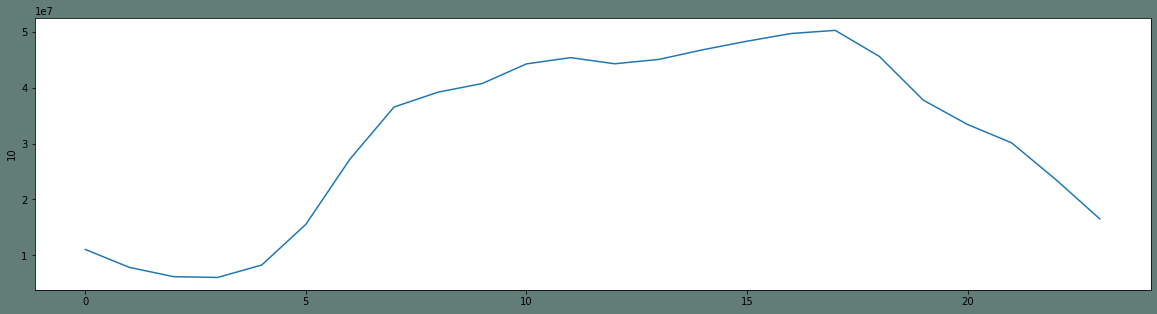

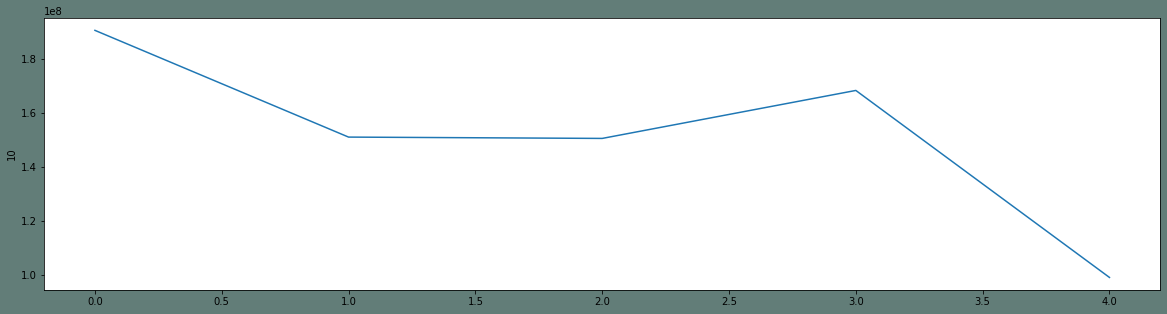

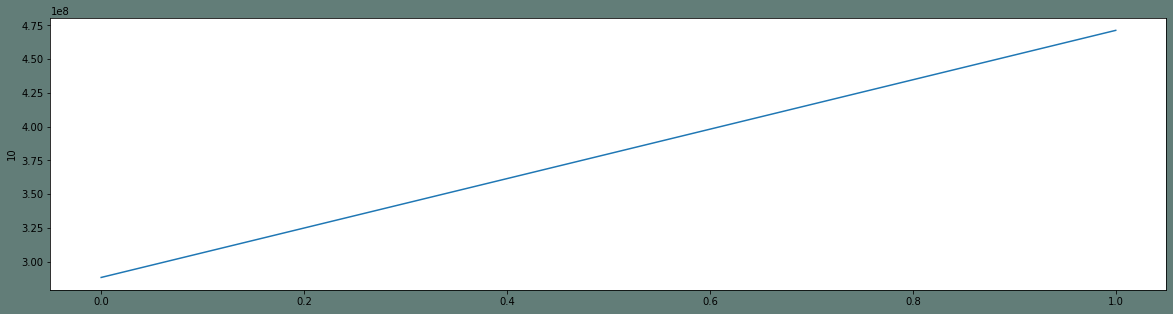

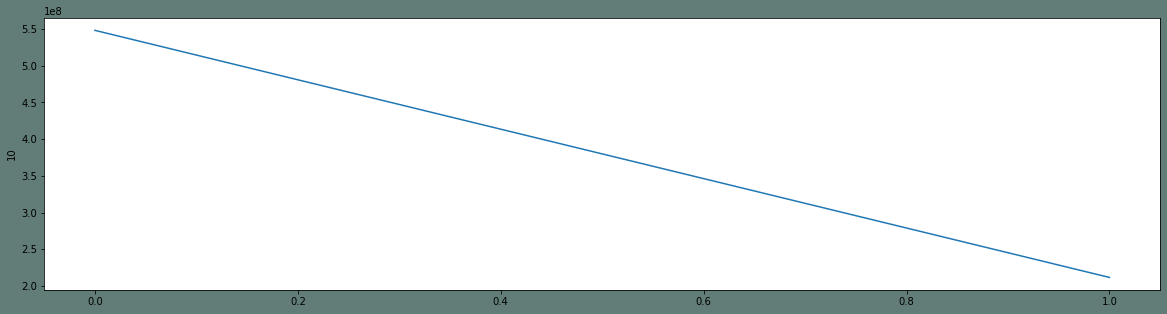

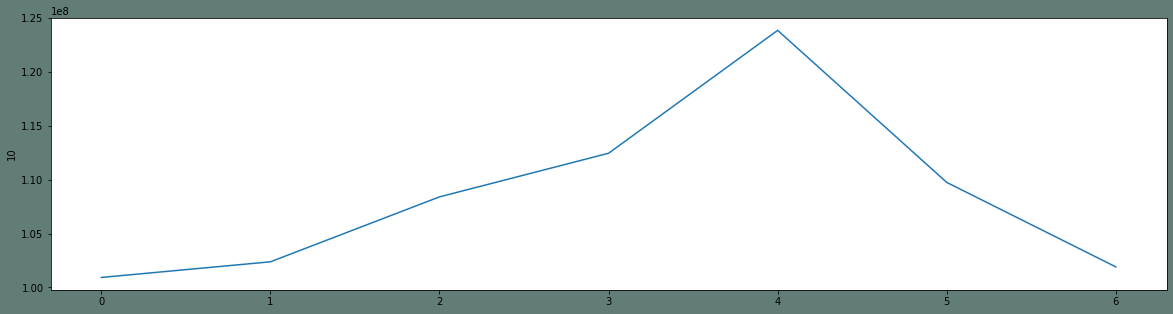

In [134]:
dfs = [time_df,month_df,pm_df,weekend_df,day_df]

for df in dfs:
    plt.figure(figsize=(20,5),facecolor="#627D78")
    ax = sns.lineplot(x=df.index,y="10",data=df)

In [133]:
time_df

,시간,10,100,101,120,121,140,150,160,200,...,1510,2510,3000,4510,5510,6000,월별,요일,오전오후,주말
0,0,11063960,2019977,164454,469055,146516,129822,4053306,136125,316548,...,177391,511094,67253,299630,212260,314140,387,419,0,40
1,1,7860227,1376073,114932,345604,95763,96124,2833127,93286,241803,...,144734,379885,47516,206694,148644,227009,387,419,0,40
2,2,6202812,1128247,98694,292715,67957,79707,2182307,70569,206148,...,120510,319465,39014,169319,123582,189728,384,419,0,40
3,3,6061379,1303871,103345,311193,65729,80881,2162553,71711,213545,...,119329,327751,38231,192855,124991,223470,384,419,0,40
4,4,8281870,2135145,151166,480370,96236,106586,3236109,111233,273274,...,151096,438976,59398,311865,198693,367508,384,419,0,40
5,5,15558397,3936811,298425,801830,244870,185377,6882533,224068,468942,...,222323,714342,110488,633196,438499,783049,384,419,0,40
6,6,27222119,7236502,615718,1366165,651183,356038,11116448,431274,862440,...,336779,1220105,232443,1526226,928202,1611403,384,419,0,40
7,7,36542308,10994245,987005,2158730,1161269,621055,14204297,672312,1375917,...,470452,2140149,480876,2672609,1504244,2590287,384,419,0,40
8,8,39199427,11554752,1198423,2798714,1319850,777284,15841373,782302,1628658,...,611540,2579865,587361,2609496,1572112,2628733,384,419,0,40
9,9,40739687,12331663,1339682,3209094,1261497,843307,17933034,824788,1972844,...,804965,2641735,449324,2326958,1529524,2659897,384,419,0,40
